In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec

In [2]:
def get_events(tstamp,state, type):
    if type == "UP":
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==1,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events
    elif type == 'DOWN':
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==0,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events        
    elif type == "BOTH":
        mask = np.concatenate((np.array([False]),state[1:]!=state[:-1]))
        events = tstamp[mask]
        return events
    else:
        return None

In [3]:
fname = './preempt_rt_data/stress/untitled.csv'
pps1_events = np.array([])
pps2_events = np.array([])
user_events = np.array([])

data = np.loadtxt(fname,dtype=float, delimiter=',',skiprows=1)

raw_ts = data[:,0];
raw_pps1 = data[:,1];
raw_pps2 = data[:,2];
raw_user = data[:,3];


In [4]:
# delete the first invalid signals
raw_data = [raw_pps1, raw_pps1, raw_user]

risings = list(map(lambda l: get_events(raw_ts,l,'UP'), raw_data ));
fallings = list(map(lambda l: get_events(raw_ts,l,'DOWN'), raw_data ));


In [5]:
first_rise = min(list(map( lambda l : l[0], risings     )))
risings = list(map(lambda l: l[l>first_rise - 0.01], risings))
fallings = list(map(lambda l: l[l>first_rise - 0.01], fallings))

pps1_up = risings[0];

last_pps_rise = pps1_up[-1];

user_up = risings[2];
user_up = user_up[user_up < last_pps_rise+0.1];
user_down = fallings[2];
user_down = user_down[user_down < last_pps_rise+0.1];



In [6]:
user_start = np.argmin(abs(pps1_up[0] - user_up))
user_up = user_up[user_start:]
user_down = user_down[user_start:]

In [7]:
# pulse around pps rising edge
user_0  = user_up[0::10]

[0.00011642 0.00010975 0.0001165  ... 0.00011608 0.00012108 0.0001085 ]


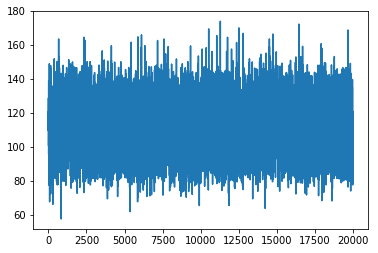

In [8]:
user_delay = user_0 - pps1_up;
print user_delay
plot(user_delay*1e6)

In [9]:
# interpolate pps to the middle points
x = range(0,len(pps1_up))
xuser = np.arange(0,len(user_up))/10.0
y = pps1_up;
pps1_up_interp = np.interp(xuser,x,y);
    

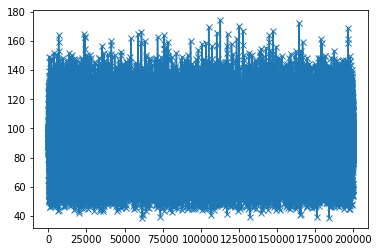

In [10]:
user_delay_interp = user_up - pps1_up_interp

plot(user_delay_interp*1e6,'x-')

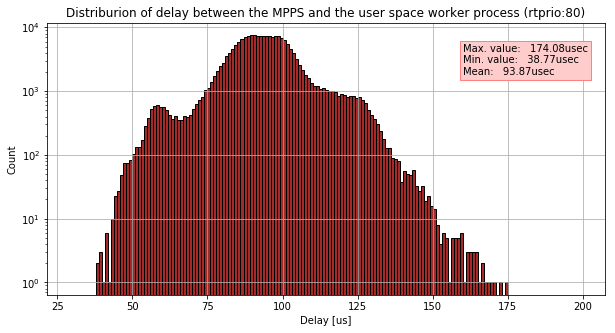

In [11]:
dist_max = max(user_delay_interp)*1e6
dist_min = min(user_delay_interp)*1e6
dist_mean = np.mean(user_delay_interp)*1e6

figure(figsize=(10,5))
hist(user_delay_interp*1e6,bins=np.arange(30,200,1),edgecolor='k',Color='brown')
yscale('log')
title('Distriburion of delay between the MPPS and the user space worker process (rtprio:80)')
xlabel('Delay [us]')
ylabel('Count')
text(160,1800,'Max. value:   %.2fusec\nMin. value:   %.2fusec\nMean:   %.2fusec' % (dist_max, dist_min, dist_mean), ha='left', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5),  fc=(1., 0.8, 0.8)))
grid()
show()

In [18]:
# mixed plot with xenomai
xeno_stress = np.load('xeno_stress.npy');

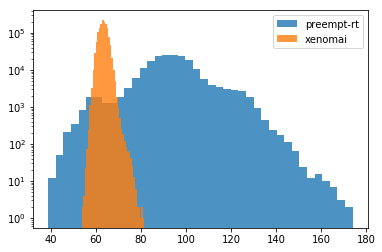

In [29]:
hist(user_delay_interp*1e6,bins = 40, alpha = 0.8,label='preempt-rt');
hist(xeno_stress*1e6,bins = 40,alpha = 0.8,label='xenomai');
yscale('log');
legend();